Regression: Simple Linear 
Dataset : diabetes.csv
Apply Data pre-processing (Label Encoding , Data Transformation….) 
techniques if necessary.
Use any one feature of the dataset to train and test the regression model. Also 
calculate coefficients, residual sum of squares and the coefficient of determination

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [54]:
data = pd.read_csv("diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
# extracting the feature and target variable
feature = 'Age'

X = data[[feature]]
Y = data['Outcome']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

model = LinearRegression()

In [57]:
model.fit(x_train, y_train)

LinearRegression()

In [58]:
y_pred = model.predict(x_test)

In [59]:
coefficients = model.coef_
rss = ((y_pred - y_test) ** 2).sum()
r2 = metrics.r2_score(y_test, y_pred)


# Display the results
print(f'Coefficients: {coefficients}')
print(f'Residual Sum of Squares (RSS): {rss}')
print(f'Coefficient of Determination (R^2): {r2}')

Coefficients: [0.00935108]
Residual Sum of Squares (RSS): 32.66740220131283
Coefficient of Determination (R^2): 0.07607347309418222


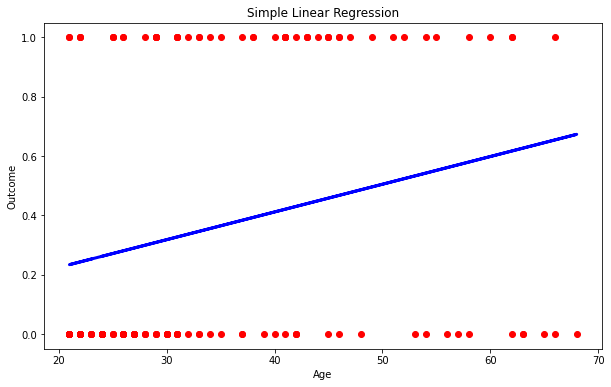

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color="red")
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xlabel(feature)
plt.ylabel('Outcome')
plt.title('Simple Linear Regression')
plt.show()